In [1]:
import jaxkern as jk
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
key = jr.PRNGKey(123)

In [2]:
X, t = datasets.make_s_curve(500, random_state=123)
X    = X[t.argsort()]

Frobenius norm of Qxx-Kxx: 103.07457733154297
Frobenius norm of Qxx-Kxx: 39.412052154541016
Frobenius norm of Qxx-Kxx: 34.50588607788086
Frobenius norm of Qxx-Kxx: 18.613428115844727


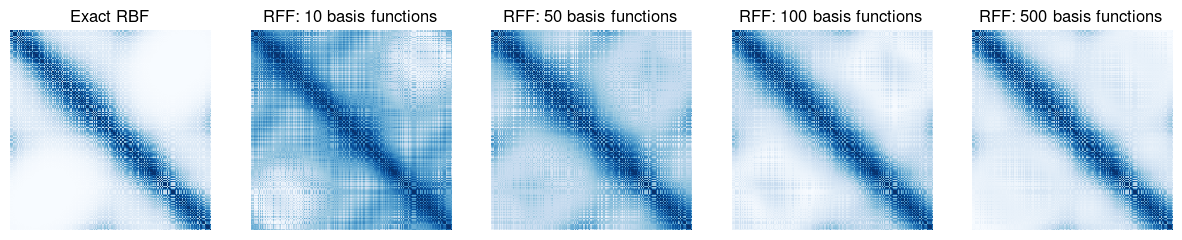

In [23]:
exact_kernel = jk.RBF(active_dims = list(range(X.shape[1])))
exact_params = exact_kernel.init_params(key)

Kxx = exact_kernel.gram(exact_params, X).to_dense()

fig, axes = plt.subplots(ncols=5, figsize=(15, 3))
axes = axes.ravel()

axes[0].matshow(Kxx, cmap = plt.cm.Blues)
axes[0].set_title('Exact RBF')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].spines[['right', 'left', 'bottom', 'top']].set_visible(False)

for m, ax in zip([10, 50, 100, 500], axes[1:]):
    approx = jk.RFF(exact_kernel, num_basis_fns=m)
    approx_params = approx.init_params(key)
    Qxx = approx.gram(approx_params, X).to_dense()
    ax.matshow(Qxx, cmap = plt.cm.Blues)
    ax.set_title(f'RFF: {m} basis functions')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines[['right', 'left', 'bottom', 'top']].set_visible(False)
    print(f"Frobenius norm of Qxx-Kxx: {jnp.linalg.norm(Qxx- Kxx, ord='fro')}")


In [13]:
approx = jk.RFF(exact_kernel, num_basis_fns=10)
approx_params = approx.init_params(key)
basis_fns = approx._compute_engine.compute_features(x=X, frequencies=approx_params['frequencies'])

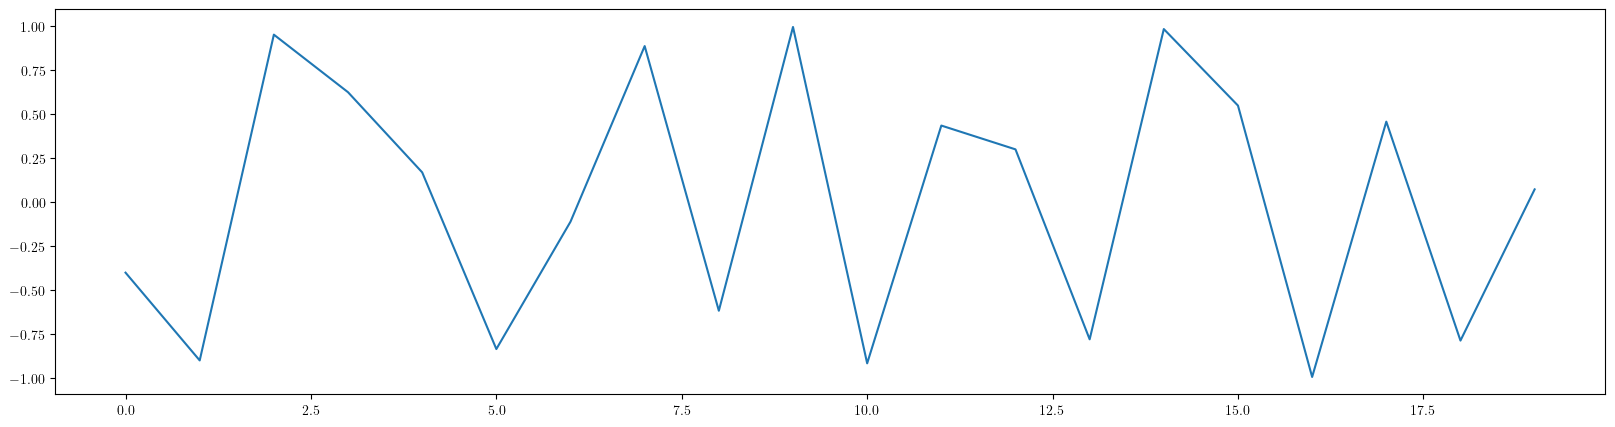

In [22]:
fig, ax = plt.subplots(figsize=(20, 5))